In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
DATASET_PATH = 'Health DataSet'
LIST_DATASET_PATH = os.listdir(DATASET_PATH)
os.listdir(DATASET_PATH)

['Current health expenditure (% of GDP).xlsx',
 'Health.xlsx',
 'Human Development Index (HDI).xlsx',
 'Life expectancy at birth (years).xlsx',
 'Life expectancy at birth, female (years).xlsx',
 'Life expectancy at birth, male (years).xlsx',
 'Life expectancy Index.xlsx',
 'Malaria incidence (per 1,000 people at risk).xlsx',
 'Mortality rate, infant (per 1,000 live births).xlsx',
 'Mortality rate, male adult (per 1,000 people).xlsx',
 'Mortality rate, under-five (per 1,000 live births).xlsx',
 'Tuberculosis incidence (per 100,000 people).xlsx']

In [3]:
tbc_dataset = pd.read_excel(os.path.join(DATASET_PATH, LIST_DATASET_PATH[-1]))
u5_dataset = pd.read_excel(os.path.join(DATASET_PATH, LIST_DATASET_PATH[10]))
adult_dataset = pd.read_excel(os.path.join(DATASET_PATH, LIST_DATASET_PATH[9]))

In [4]:
tbc_country = set(tbc_dataset['Country'])
u5_country = set(u5_dataset['Country'])
adult_country = set(adult_dataset['Country'])

In [5]:
intersec = tbc_country.intersection(u5_country)
intersec = intersec.intersection(adult_country)

In [6]:
country_tbc = tbc_dataset.set_index("Country")
country_u5 = u5_dataset.set_index("Country")
country_adult = adult_dataset.set_index("Country")

In [7]:
for country in tbc_dataset['Country']:
    if country not in intersec:
        country_tbc = country_tbc.drop(country, axis=0)

In [8]:
for country in u5_dataset['Country']:
    if country not in intersec:
        country_u5 = country_u5.drop(country, axis=0)

In [9]:
for country in adult_dataset['Country']:
    if country not in intersec:
        country_adult = country_adult.drop(country, axis=0)

In [10]:
country_tbc.to_excel('TBC_Dataset.xlsx')
country_u5.to_excel('U5_Dataset.xlsx')
country_adult.to_excel('Adult_Dataset.xlsx')

In [11]:
tbc_dataset = pd.read_excel('TBC_Dataset.xlsx')
u5_dataset = pd.read_excel('U5_Dataset.xlsx')
adult_dataset = pd.read_excel('Adult_Dataset.xlsx')

In [12]:
print(tbc_dataset.columns)
print(u5_dataset.columns)
print(adult_dataset.columns)

Index(['Country', 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='object')
Index(['Country', 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='object')
Index(['Country', 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='object')


In [13]:
print(tbc_dataset.info())
print(u5_dataset.info())
print(adult_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
Country    187 non-null object
2000       187 non-null object
2005       187 non-null object
2010       187 non-null object
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64
dtypes: float64(6), object(4)
memory usage: 14.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
Country    187 non-null object
2000       187 non-null float64
2005       187 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64
dtypes: float64(9), object(1)
memory usage: 14.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
R

In [36]:
tbc = tbc_dataset.describe()
tbc_mean = np.mean(tbc.T['mean'])

u5 = tbc_dataset.describe()
u5_mean = np.mean(u5.T['mean'])

adult = tbc_dataset.describe()
adult_mean = np.mean(adult.T['mean'])

In [39]:
tbc_dataset = tbc_dataset.replace(to_replace='..', value=tbc_mean)

u5_dataset = u5_dataset.replace(to_replace='..', value=u5_mean)

adult_dataset = adult_dataset.replace(to_replace='..', value=adult_mean)

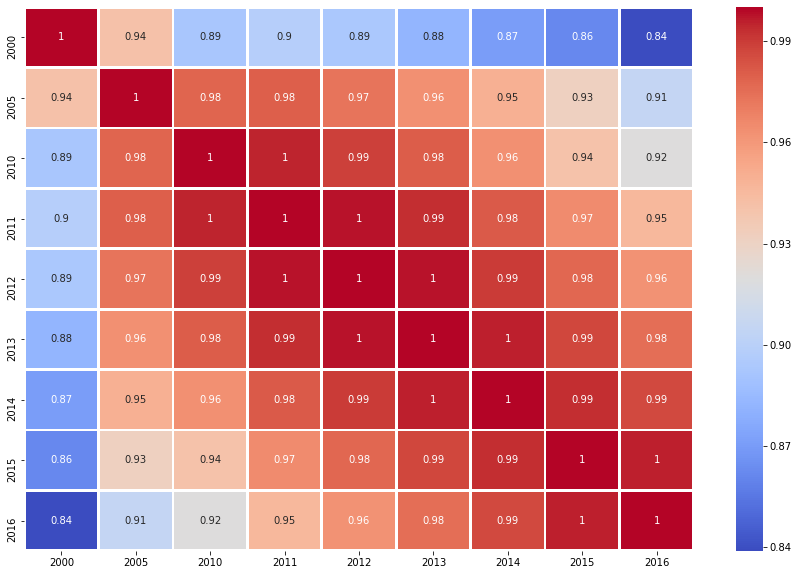

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(tbc_dataset.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2);
plt.savefig('tbc_dataset_corr.png')

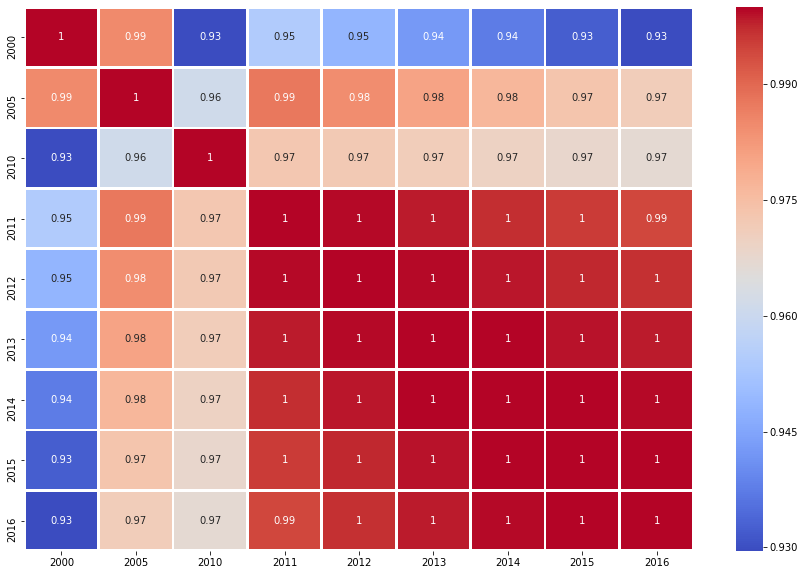

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(u5_dataset.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2);
plt.savefig('u5_dataset_corr.png')

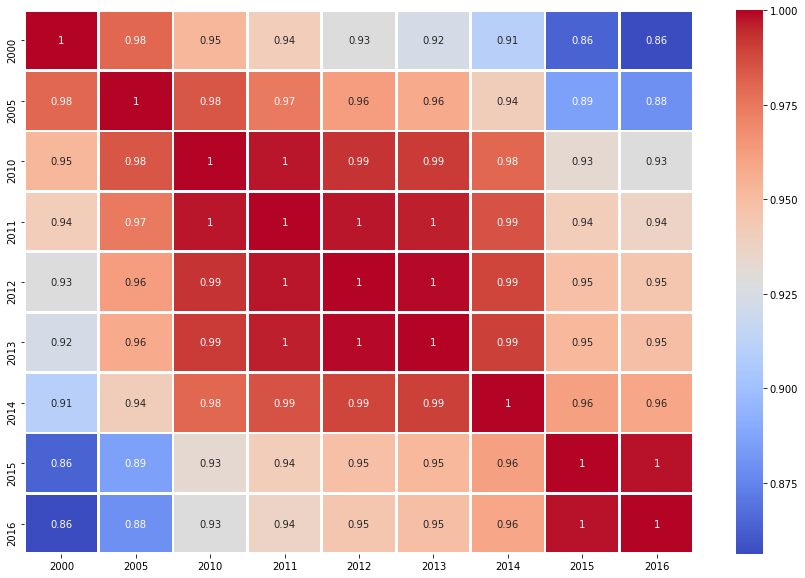

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(adult_dataset.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2);
plt.savefig('adult_dataset_corr.png')

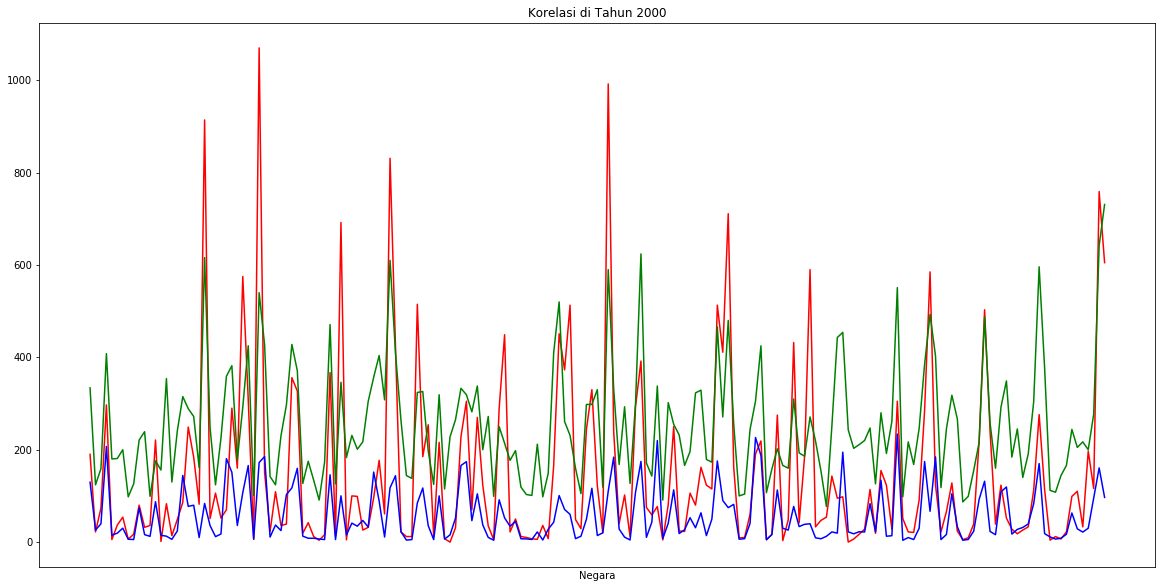

In [67]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(tbc_dataset['Country'], tbc_dataset[2000], 'r')
plt.plot(u5_dataset['Country'], u5_dataset[2000], 'b')
plt.plot(adult_dataset['Country'], adult_dataset[2000], 'g')
plt.xticks([])
plt.xlabel('Negara')
plt.title('Korelasi di Tahun 2000')
plt.savefig('2000.png')
plt.show()

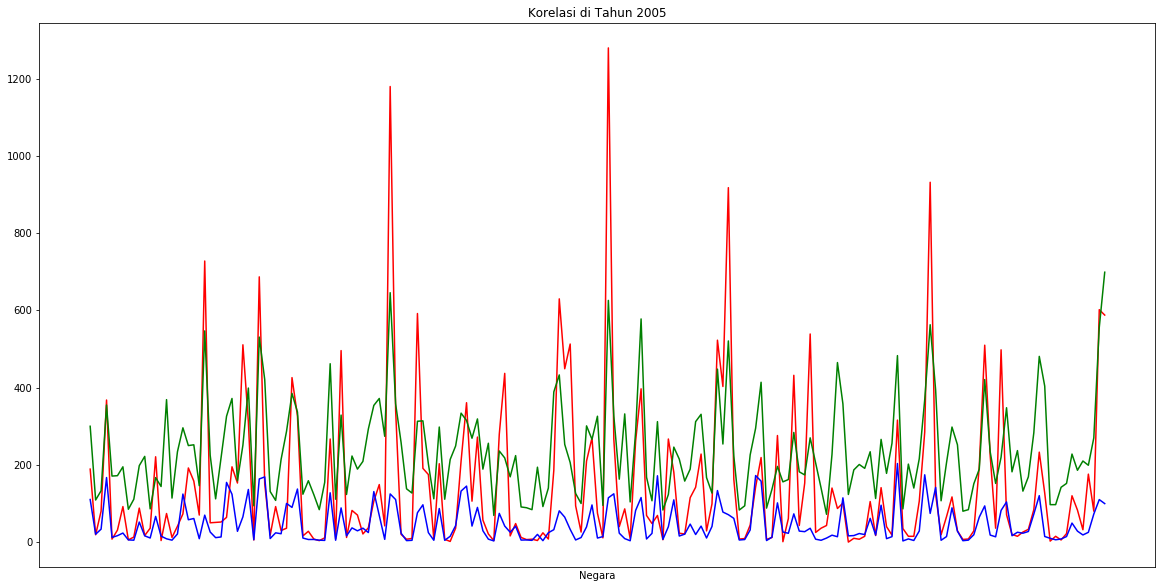

In [68]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(tbc_dataset['Country'], tbc_dataset[2005], 'r')
plt.plot(u5_dataset['Country'], u5_dataset[2005], 'b')
plt.plot(adult_dataset['Country'], adult_dataset[2005], 'g')
plt.xticks([])
plt.xlabel('Negara')
plt.title('Korelasi di Tahun 2005')
plt.savefig('2005.png')
plt.show()

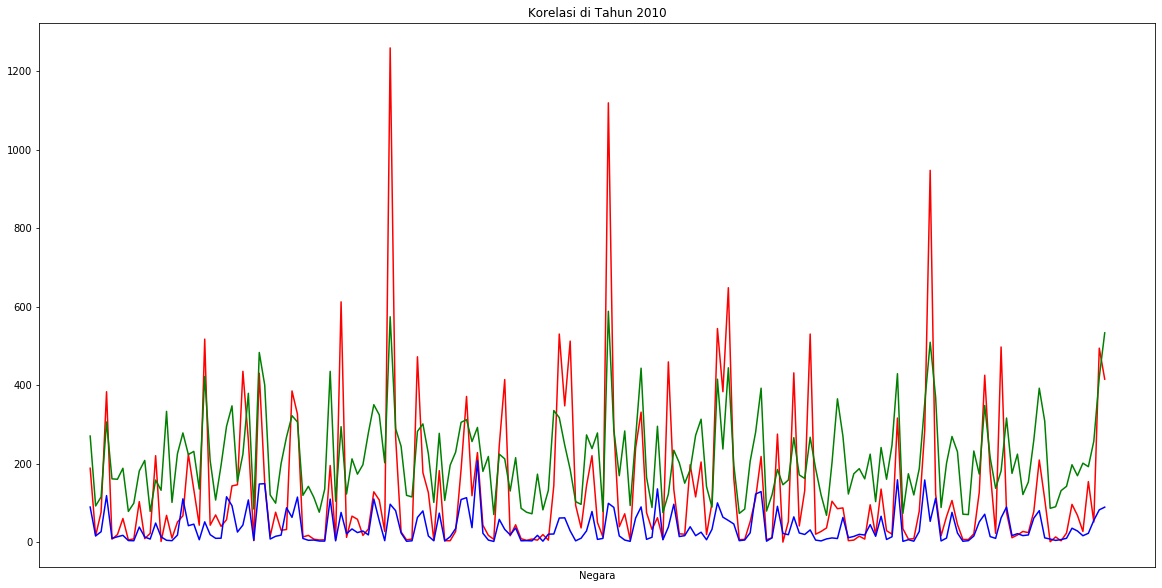

In [69]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(tbc_dataset['Country'], tbc_dataset[2010], 'r')
plt.plot(u5_dataset['Country'], u5_dataset[2010], 'b')
plt.plot(adult_dataset['Country'], adult_dataset[2010], 'g')
plt.xticks([])
plt.xlabel('Negara')
plt.title('Korelasi di Tahun 2010')
plt.savefig('2010.png')
plt.show()

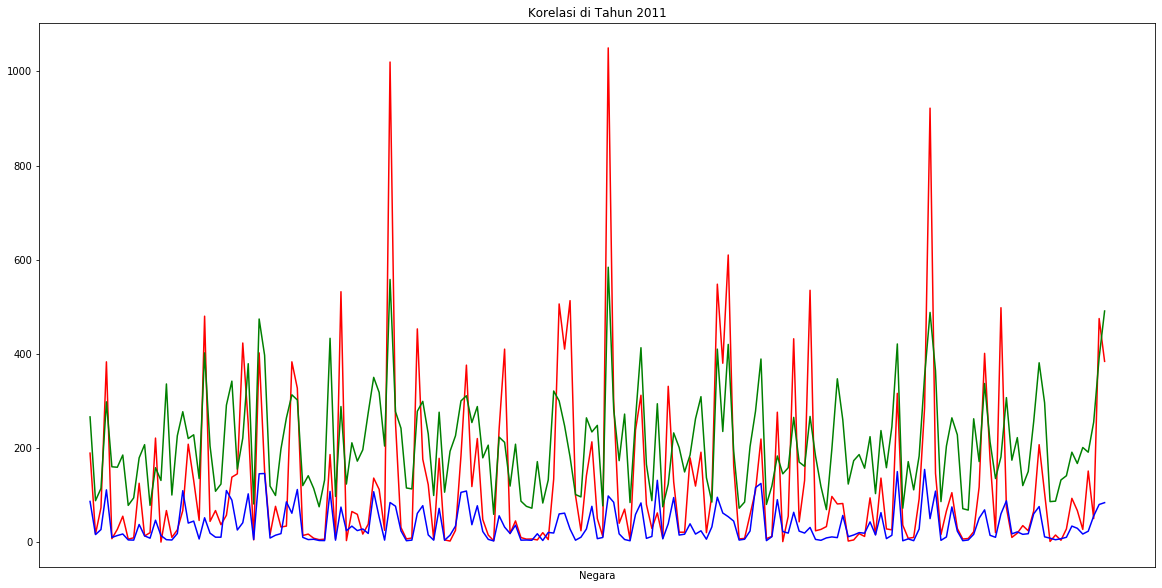

In [70]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(tbc_dataset['Country'], tbc_dataset[2011], 'r')
plt.plot(u5_dataset['Country'], u5_dataset[2011], 'b')
plt.plot(adult_dataset['Country'], adult_dataset[2011], 'g')
plt.xticks([])
plt.xlabel('Negara')
plt.title('Korelasi di Tahun 2011')
plt.savefig('2011.png')
plt.show()

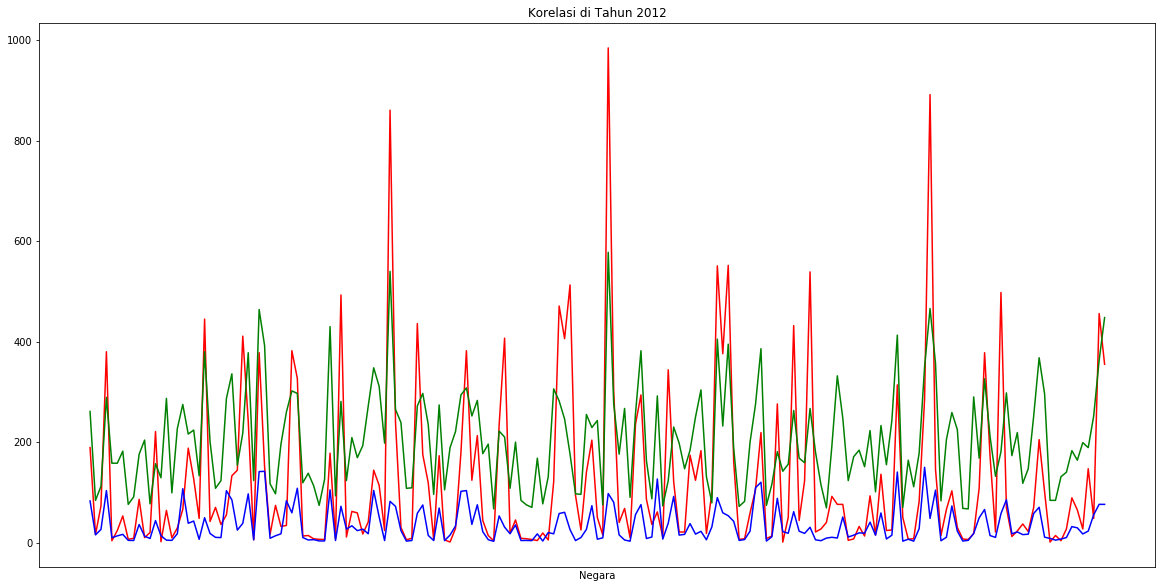

In [71]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(tbc_dataset['Country'], tbc_dataset[2012], 'r')
plt.plot(u5_dataset['Country'], u5_dataset[2012], 'b')
plt.plot(adult_dataset['Country'], adult_dataset[2012], 'g')
plt.xticks([])
plt.xlabel('Negara')
plt.title('Korelasi di Tahun 2012')
plt.savefig('2012.png')
plt.show()

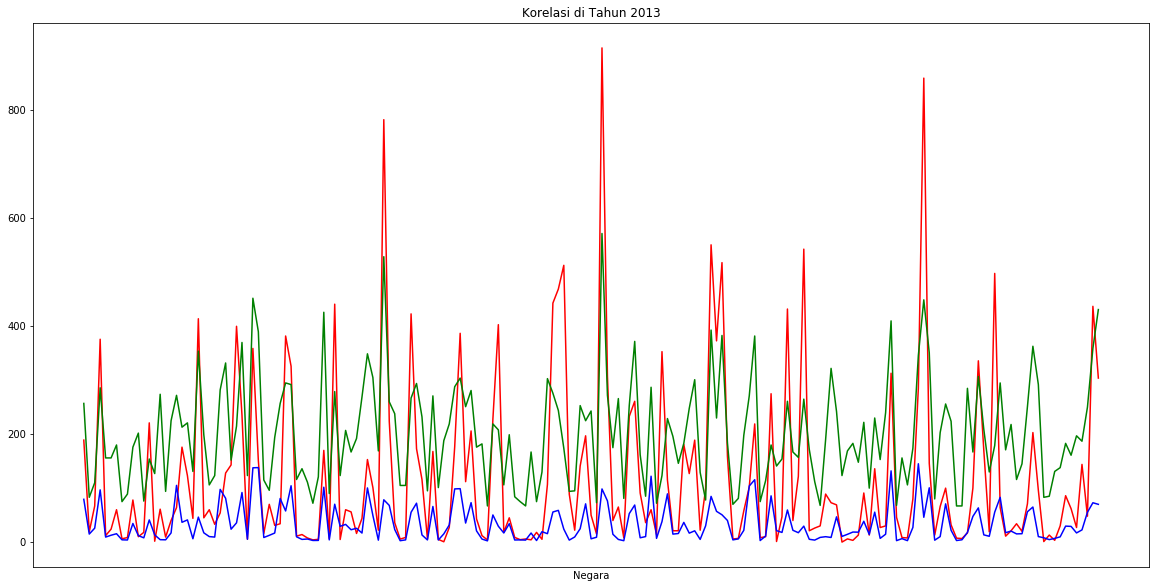

In [72]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(tbc_dataset['Country'], tbc_dataset[2013], 'r')
plt.plot(u5_dataset['Country'], u5_dataset[2013], 'b')
plt.plot(adult_dataset['Country'], adult_dataset[2013], 'g')
plt.xticks([])
plt.xlabel('Negara')
plt.title('Korelasi di Tahun 2013')
plt.savefig('2013.png')
plt.show()

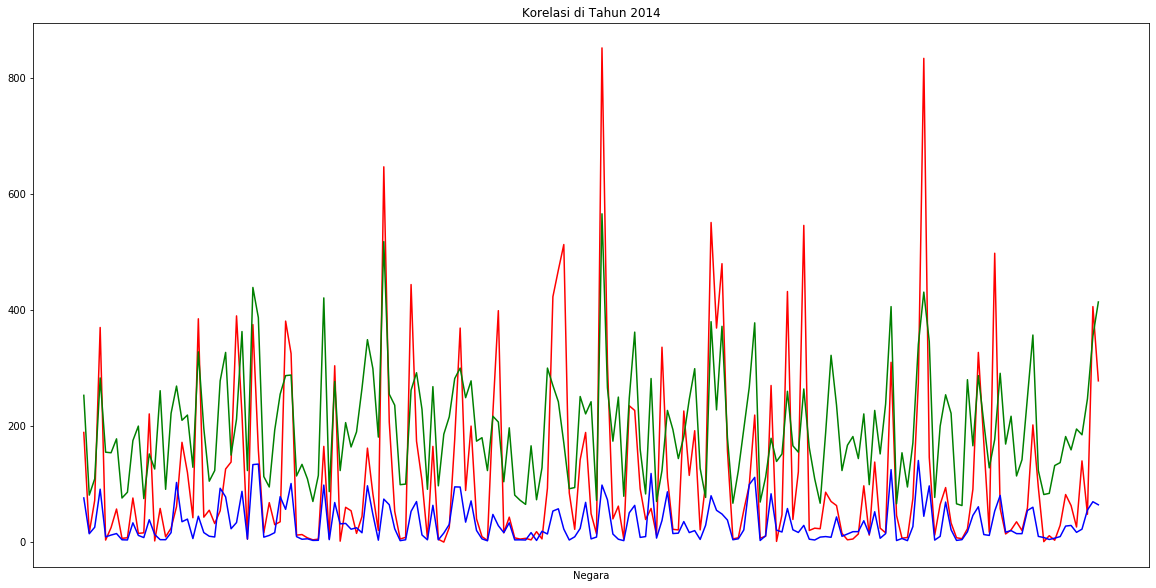

In [73]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(tbc_dataset['Country'], tbc_dataset[2014], 'r')
plt.plot(u5_dataset['Country'], u5_dataset[2014], 'b')
plt.plot(adult_dataset['Country'], adult_dataset[2014], 'g')
plt.xticks([])
plt.xlabel('Negara')
plt.title('Korelasi di Tahun 2014')
plt.savefig('2014.png')
plt.show()

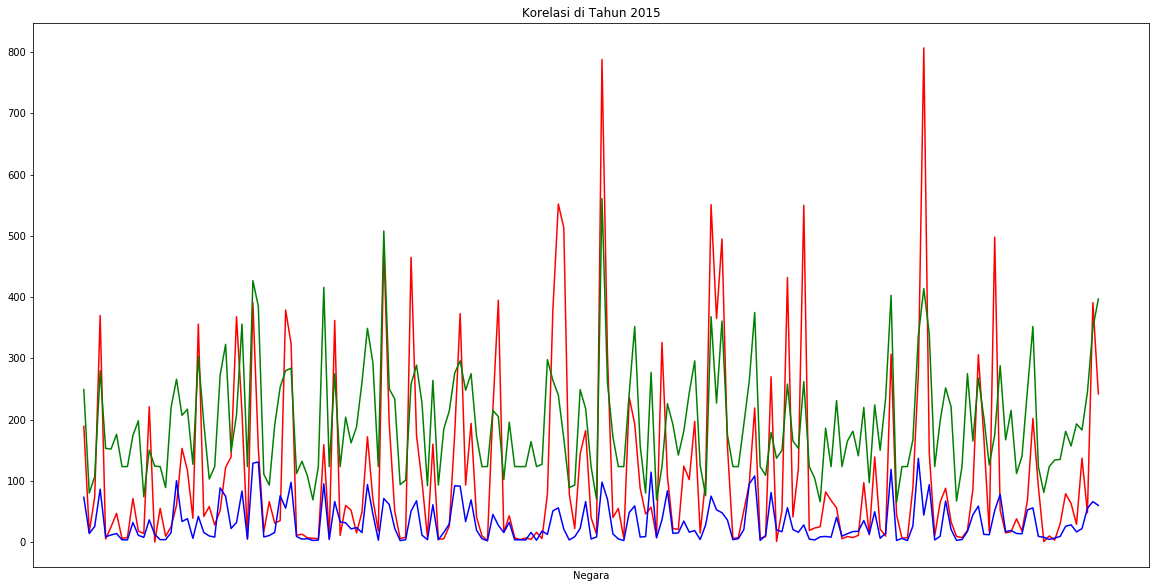

In [74]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(tbc_dataset['Country'], tbc_dataset[2015], 'r')
plt.plot(u5_dataset['Country'], u5_dataset[2015], 'b')
plt.plot(adult_dataset['Country'], adult_dataset[2015], 'g')
plt.xticks([])
plt.xlabel('Negara')
plt.title('Korelasi di Tahun 2015')
plt.savefig('2015.png')
plt.show()

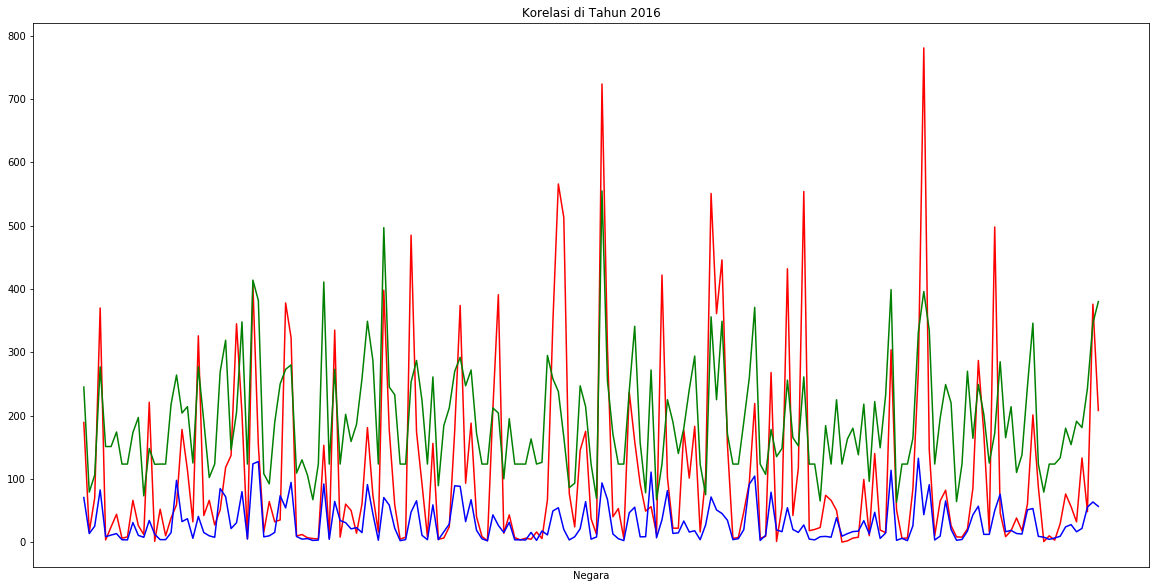

In [75]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(tbc_dataset['Country'], tbc_dataset[2016], 'r')
plt.plot(u5_dataset['Country'], u5_dataset[2016], 'b')
plt.plot(adult_dataset['Country'], adult_dataset[2016], 'g')
plt.xticks([])
plt.xlabel('Negara')
plt.title('Korelasi di Tahun 2016')
plt.savefig('2016.png')
plt.show()